## 전체 코드와 시각화

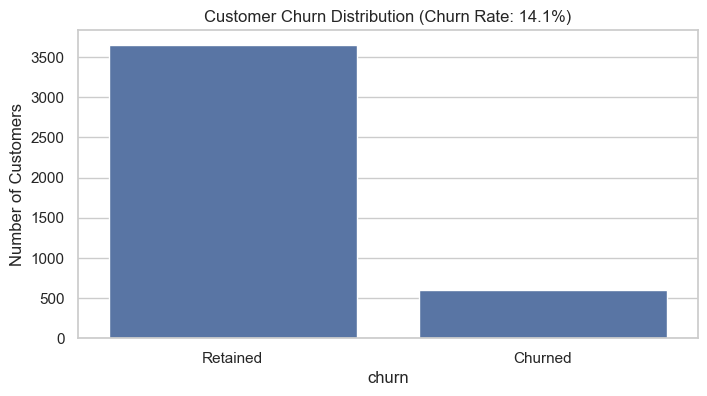

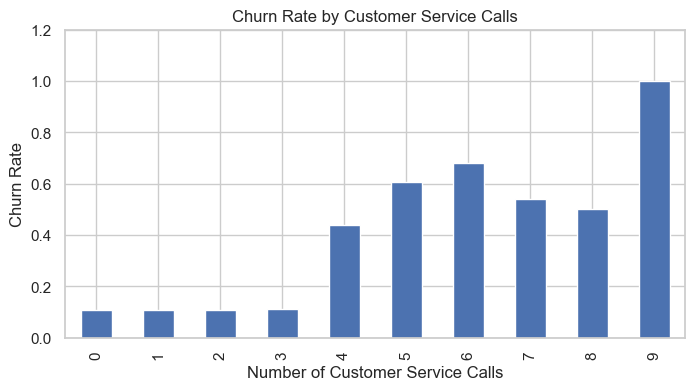

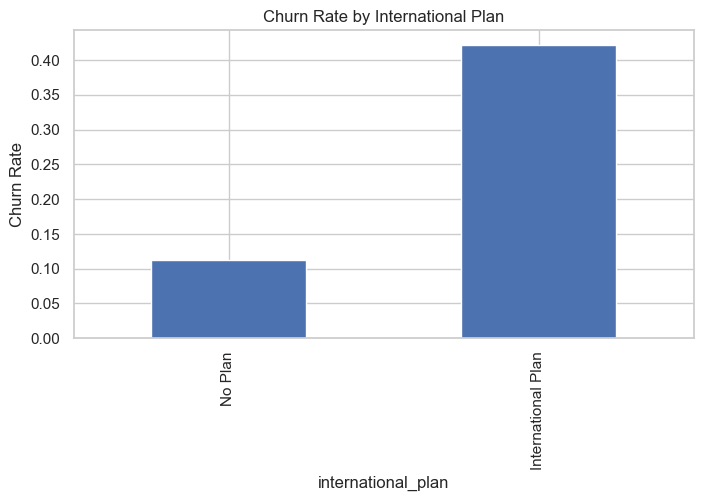

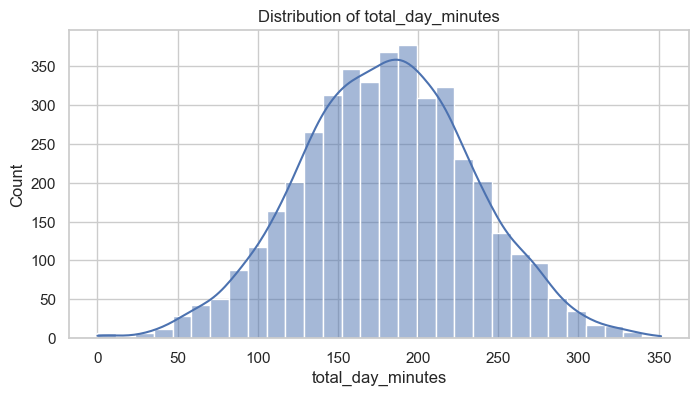

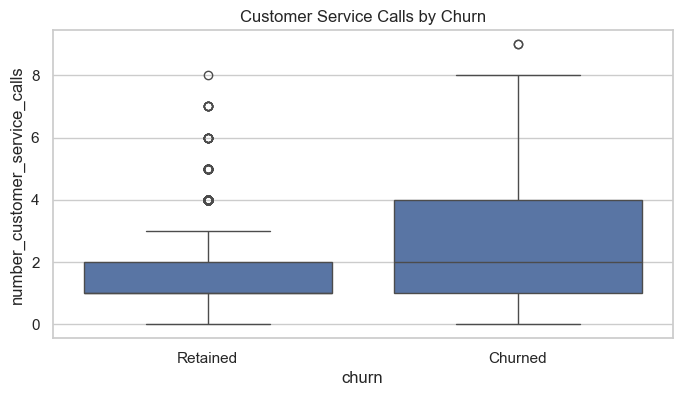

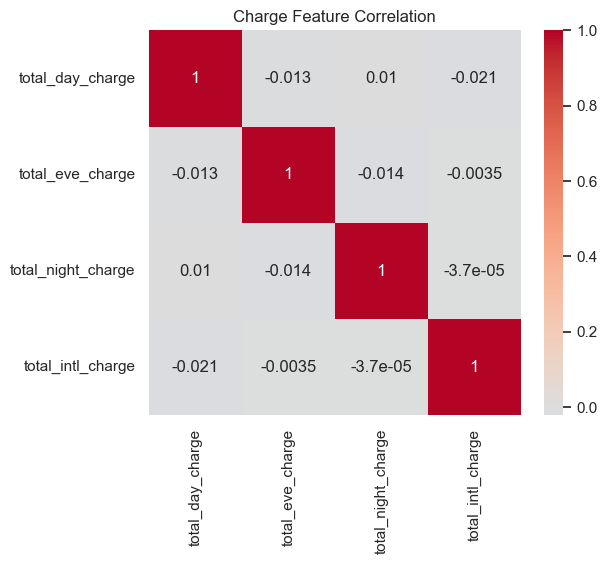

In [14]:
# 📊 Presentation-ready Visualizations for Telecom Churn Analysis
# 각 시각화는 '발표용 설명'에 최적화되어 있으며, 개별 실행이 가능합니다.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (8, 4)

# 데이터 로드
def load_data(path="../../data/01_raw/train.csv"):
    df = pd.read_csv(path)
    if df['churn'].dtype == object:
        df['churn'] = df['churn'].map({'yes': 1, 'no': 0})
    return df

# --------------------------------------------------
# 1️⃣ 전체 고객 이탈 분포 (문제 제기용)
# --------------------------------------------------
def plot_churn_distribution(df):
    churn_rate = df['churn'].mean() * 100

    plt.figure()
    sns.countplot(x='churn', data=df)
    plt.title(f"Customer Churn Distribution (Churn Rate: {churn_rate:.1f}%)")
    plt.xticks([0, 1], ['Retained', 'Churned'])
    plt.ylabel("Number of Customers")
    plt.show()

# 발표 포인트:
# - 이탈 고객은 소수지만, 영향은 크다

# --------------------------------------------------
# 2️⃣ 고객센터 문의 횟수 vs 이탈률 (핵심 인사이트)
# --------------------------------------------------
def plot_cs_calls_vs_churn(df):
    cs_churn = df.groupby('number_customer_service_calls')['churn'].mean()

    plt.figure()
    cs_churn.plot(kind='bar')
    plt.title("Churn Rate by Customer Service Calls")
    plt.xlabel("Number of Customer Service Calls")
    plt.ylabel("Churn Rate")
    plt.ylim(0, cs_churn.max() * 1.2)
    plt.show()

# 발표 포인트:
# - 3~4회 이상부터 이탈률이 급격히 상승
# - 이탈 직전 신호로 활용 가능

# --------------------------------------------------
# 3️⃣ 국제전화 요금제 가입 여부에 따른 이탈률
# --------------------------------------------------
def plot_international_plan_churn(df):
    intl_churn = df.groupby('international_plan')['churn'].mean()

    plt.figure()
    intl_churn.plot(kind='bar')
    plt.title("Churn Rate by International Plan")
    plt.xticks([0, 1], ['No Plan', 'International Plan'])
    plt.ylabel("Churn Rate")
    plt.show()

# 발표 포인트:
# - 국제전화 고객은 가격 민감 고객군
# - 요금제 개선의 명확한 타겟

# --------------------------------------------------
# 4️⃣ 주요 사용량 변수 분포 (고사용자 강조)
# --------------------------------------------------
def plot_usage_distribution(df, column):
    plt.figure()
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

# 발표 포인트:
# - 소수의 고사용자가 매출과 이탈에 큰 영향

# --------------------------------------------------
# 5️⃣ Churn vs 고객센터 문의 횟수 (Boxplot)
# --------------------------------------------------
def plot_box_cs_calls(df):
    plt.figure()
    sns.boxplot(x='churn', y='number_customer_service_calls', data=df)
    plt.title("Customer Service Calls by Churn")
    plt.xticks([0, 1], ['Retained', 'Churned'])
    plt.show()

# 발표 포인트:
# - 이탈 고객의 중앙값이 명확히 높음

# --------------------------------------------------
# 6️⃣ 요금 변수 상관관계 (신뢰도 확보용)
# --------------------------------------------------
def plot_charge_correlation(df):
    charge_cols = [c for c in df.columns if 'charge' in c]
    corr = df[charge_cols].corr()

    plt.figure(figsize=(6, 5))
    sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
    plt.title("Charge Feature Correlation")
    plt.show()

# 발표 포인트:
# - 요금 변수 간 강한 상관관계
# - 트리 기반 모델 선택의 근거

# --------------------------------------------------
# 7️⃣ 전략 시뮬레이션 효과 (Before vs After)
# --------------------------------------------------
def plot_simulation_effect(before_churn, after_churn):
    labels = ['Before (AS-IS)', 'After (TO-BE)']
    values = [before_churn, after_churn]

    plt.figure()
    bars = plt.bar(labels, values)
    plt.ylabel('Churn Rate (%)')
    plt.title('Effect of Retention Strategy Simulation')
    plt.ylim(0, max(values) * 1.3)

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.5,
                 f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')
    plt.show()

# 발표 포인트:
# - 전략 적용 시 이탈률이 실제로 얼마나 줄어드는지 직관적으로 전달

# --------------------------------------------------
# 8️⃣ 기대 효과: 연간 매출 회복 비교
# --------------------------------------------------
def plot_expected_revenue_effect(current_loss, projected_loss):
    labels = ['Current Loss', 'Projected Loss']
    values = [current_loss, projected_loss]

    plt.figure()
    bars = plt.barh(labels, values)
    plt.xlabel('Annual Revenue Loss')
    plt.title('Expected Revenue Recovery (Yearly)')

    for bar in bars:
        width = bar.get_width()
        plt.text(width * 1.01, bar.get_y() + bar.get_height()/2,
                 f'${width:,.0f}', va='center', fontweight='bold')
    plt.show()

# 발표 포인트:
# - 이탈률 감소가 실제 돈으로 얼마나 의미 있는지 강조

# --------------------------------------------------
# 9️⃣ 최종 결론 시각화 (메시지 전달용)
# --------------------------------------------------
def plot_final_message():
    plt.figure(figsize=(8, 3))
    plt.text(0.5, 0.6, 'Customer Churn is NOT Random', ha='center', va='center', fontsize=18, fontweight='bold')
    plt.text(0.5, 0.4, '→ It is Predictable and Manageable', ha='center', va='center', fontsize=14)
    plt.axis('off')
    plt.title('Final Conclusion')
    plt.show()

# 발표 포인트:
# - 기술보다 메시지 중심
# - 경영진/비개발자에게 강한 인상

# --------------------------------------------------
# 실행 예시
# --------------------------------------------------
if __name__ == "__main__":
    df = load_data()

    plot_churn_distribution(df)
    plot_cs_calls_vs_churn(df)
    plot_international_plan_churn(df)
    plot_usage_distribution(df, 'total_day_minutes')
    plot_box_cs_calls(df)
    plot_charge_correlation(df)


1️⃣ 문제 제기

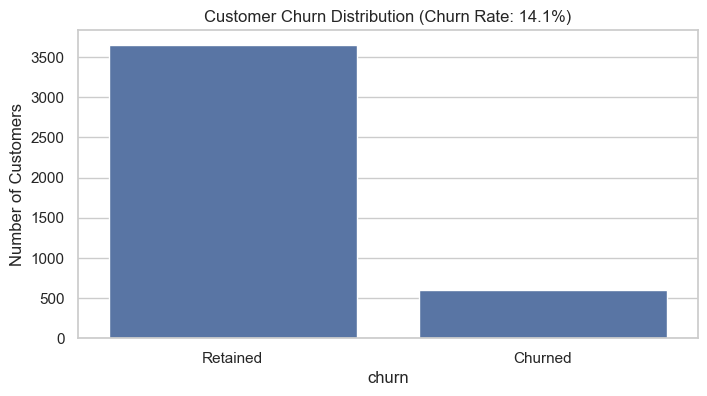

In [9]:
plot_churn_distribution(df)

2️⃣ 핵심 원인 ① 고객센터

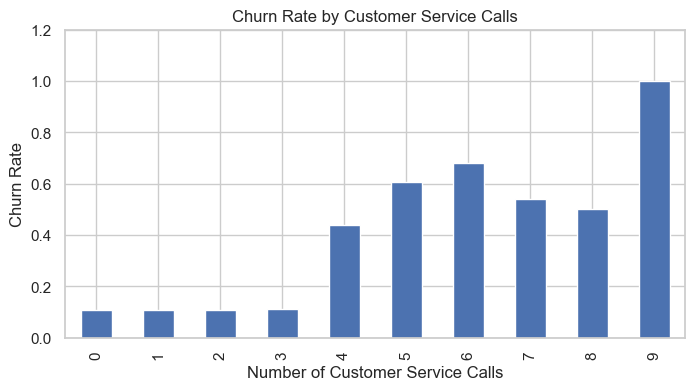

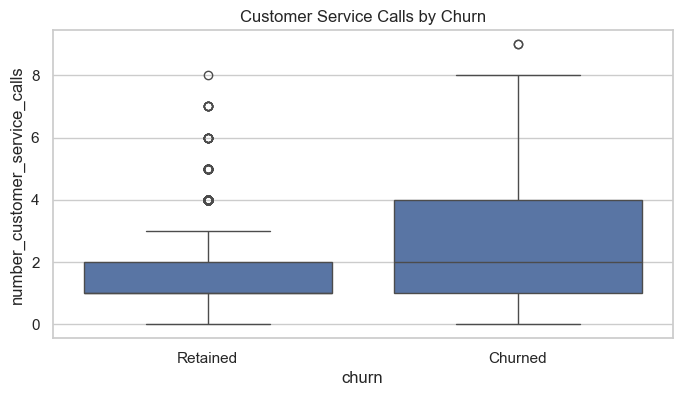

In [10]:
plot_cs_calls_vs_churn(df)
plot_box_cs_calls(df)


3️⃣ 핵심 원인 ② 국제전화

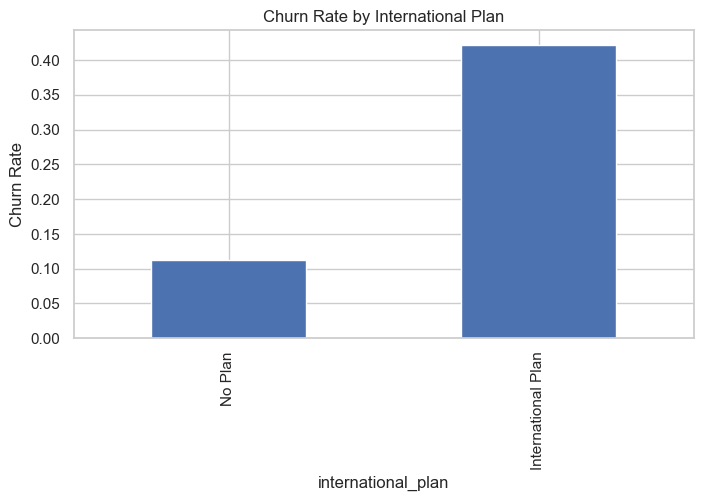

In [11]:
plot_international_plan_churn(df)


4️⃣ 보조 설명 (신뢰도 강화)

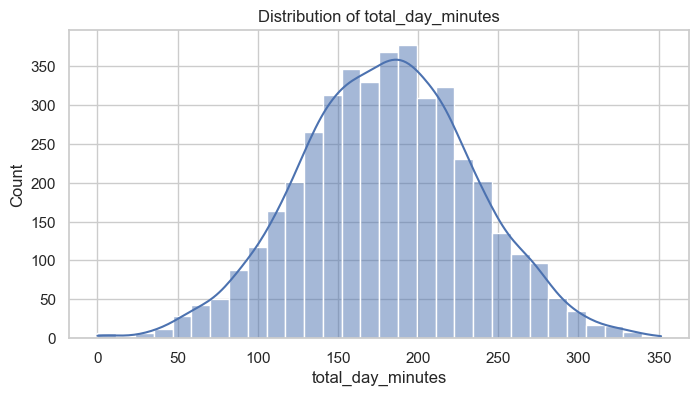

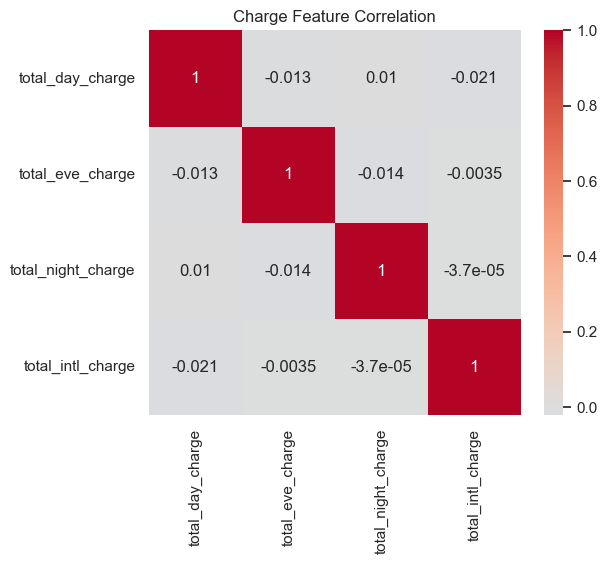

In [12]:
plot_usage_distribution(df, 'total_day_minutes')
plot_charge_correlation(df)


7️⃣ 전략 시뮬레이터 효과 (Before vs After)

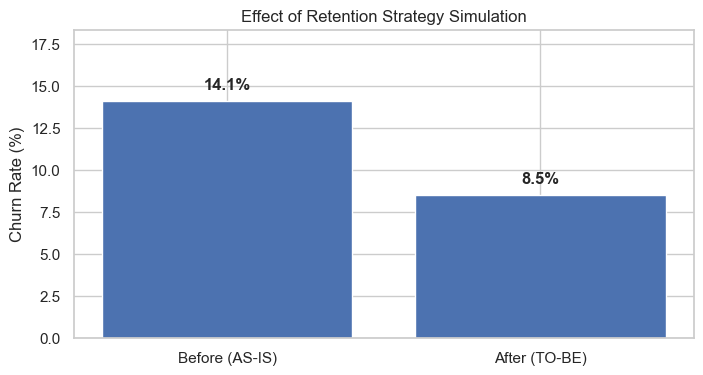

In [15]:
plot_simulation_effect(before_churn=14.1, after_churn=8.5)

8️⃣ 기대 효과: 연간 매출 회복

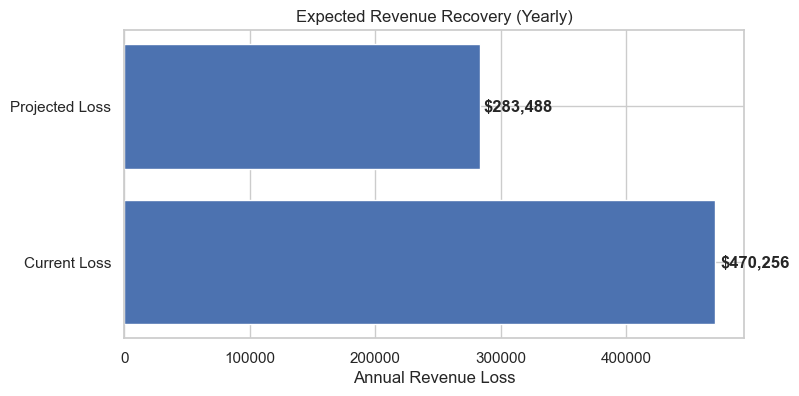

In [16]:
plot_expected_revenue_effect(
    current_loss=39188 * 12,
    projected_loss=39188 * 12 * (8.5 / 14.1)
)


9️⃣ 최종 결론 시각화 (Closing Slide)

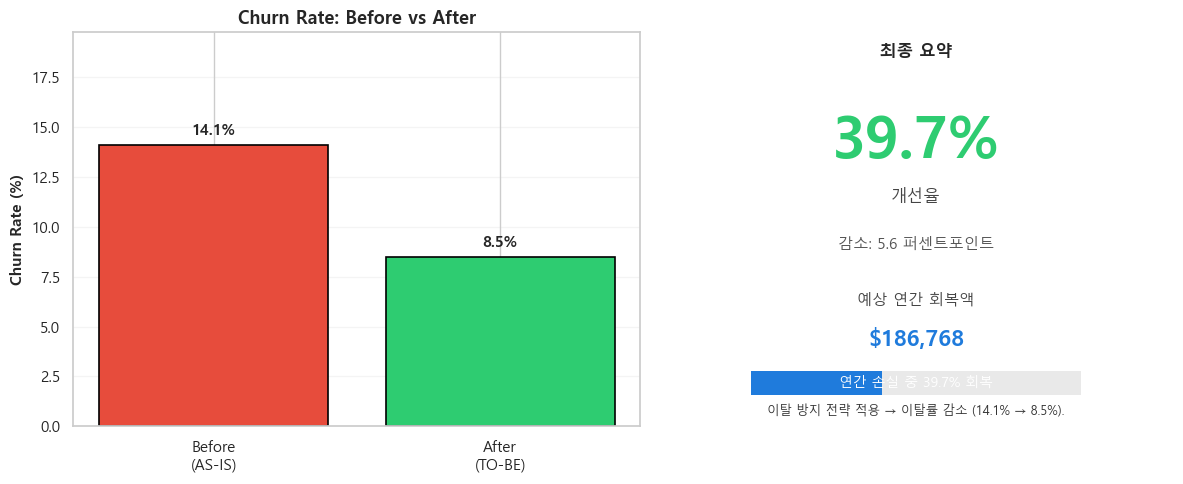

In [32]:
def plot_final_message(
    before_churn=14.1,
    after_churn=8.5,
    annual_recovery=0,
    currency_prefix='$',
    show_thousands=True
):
    """Compact final-slide summary (Korean right-side):
    - Left: Before vs After bars
    - Right: Big improvement %, reduction in points, and estimated annual recovery with progress bar (Korean)
    """
    import platform
    import matplotlib as mpl
    # Set OS-appropriate Korean font to avoid 깨짐 on Windows/mac/linux
    if platform.system() == 'Windows':
        mpl.rcParams['font.family'] = 'Malgun Gothic'
    elif platform.system() == 'Darwin':
        mpl.rcParams['font.family'] = 'AppleGothic'
    else:
        # common Linux Korean fonts
        mpl.rcParams['font.family'] = 'NanumGothic'
    mpl.rcParams['axes.unicode_minus'] = False

    from matplotlib import gridspec
    from matplotlib.patches import Rectangle

    improvement_rate = max(0.0, ((before_churn - after_churn) / before_churn) * 100)
    reduction_pts = before_churn - after_churn

    # format monetary value
    def fmt_money(x):
        if x is None:
            return ''
        if show_thousands:
            return f"{currency_prefix}{x:,.0f}"
        return f"{currency_prefix}{x:.0f}"

    # estimated recovered amount
    recovered_amt = annual_recovery * (improvement_rate / 100.0) if annual_recovery else 0

    fig = plt.figure(figsize=(12, 5))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1.1, 1])

    # LEFT: clean bar chart
    ax0 = fig.add_subplot(gs[0])
    labels = ['Before\n(AS-IS)', 'After\n(TO-BE)']
    values = [before_churn, after_churn]
    colors = ['#e74c3c', '#2ecc71']

    bars = ax0.bar(labels, values, color=colors, edgecolor='black', linewidth=1.2)
    ax0.set_ylim(0, max(values) * 1.4)
    ax0.set_ylabel('Churn Rate (%)', fontsize=11, fontweight='bold')
    ax0.set_title('Churn Rate: Before vs After', fontsize=13, fontweight='bold')
    ax0.grid(axis='y', alpha=0.2)

    for bar, v in zip(bars, values):
        ax0.text(bar.get_x() + bar.get_width() / 2, v + 0.3, f'{v:.1f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

    # RIGHT: summary block (Korean)
    ax1 = fig.add_subplot(gs[1])
    ax1.axis('off')

    # Big improvement percent
    ax1.text(0.5, 0.72, f'{improvement_rate:.1f}%', ha='center', va='center', fontsize=42, fontweight='bold', color='#2ecc71')
    ax1.text(0.5, 0.58, '개선율', ha='center', va='center', fontsize=12, color='#444')

    # reduction in points
    ax1.text(0.5, 0.46, f'감소: {reduction_pts:.1f} 퍼센트포인트', ha='center', va='center', fontsize=11, color='#555')

    # monetary recovery section
    if annual_recovery and annual_recovery != 0:
        ax1.text(0.5, 0.32, '예상 연간 회복액', ha='center', va='center', fontsize=11, color='#444')
        ax1.text(0.5, 0.22, fmt_money(recovered_amt), ha='center', va='center', fontsize=16, fontweight='bold', color='#1f7bdc')

        # horizontal progress bar
        bar_left = 0.18
        bar_width = 0.64
        bar_y = 0.08
        bar_h = 0.06
        pct = min(improvement_rate / 100.0, 1.0)

        # background
        ax1.add_patch(Rectangle((bar_left, bar_y), bar_width, bar_h, transform=ax1.transAxes, facecolor='#e9e9e9', edgecolor='none'))
        # filled
        ax1.add_patch(Rectangle((bar_left, bar_y), bar_width * pct, bar_h, transform=ax1.transAxes, facecolor='#1f7bdc', edgecolor='none'))
        ax1.text(0.5, bar_y + bar_h / 2, f'연간 손실 중 {improvement_rate:.1f}% 회복', ha='center', va='center', fontsize=10, color='#fff' if pct>0.15 else '#222', transform=ax1.transAxes)

    # small callout / takeaway line (Korean)
    takeaway = f"이탈 방지 전략 적용 → 이탈률 감소 ({before_churn:.1f}% → {after_churn:.1f}%)."
    ax1.text(0.5, 0.95, '최종 요약', ha='center', va='center', fontsize=12, fontweight='bold', transform=ax1.transAxes)
    ax1.text(0.5, 0.02, takeaway, ha='center', va='bottom', fontsize=9, color='#333', transform=ax1.transAxes)

    plt.tight_layout()
    plt.show()


# Example preview with estimated annual loss (use your company's value if available)
plot_final_message(before_churn=14.1, after_churn=8.5, annual_recovery=39188 * 12)
